In [13]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/customer_segmentation_data.csv')

In [15]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
# Drop ID column
df = df.drop('id', axis=1)

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Choose K based on the elbow point (e.g., K=5)
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

# Assign cluster labels
df['cluster'] = kmeans.labels_

ValueError: could not convert string to float: 'Female'

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
for cols in df.columns:
  if df[cols].dtype == 'object':
    df[cols] = df[cols].astype('category')

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [24]:
# Convert object columns to categorical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['category']):
    df[col] = le.fit_transform(df[col])

In [25]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [26]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# Assign cluster labels
df['cluster'] = kmeans.labels_

# Analyze clusters
print(df.groupby('cluster').mean())


              age    gender    income  spending_score  membership_years  \
cluster                                                                   
0       -0.610384 -0.694009 -0.525873        0.483463          0.159493   
1        0.360770 -0.051513  0.831018        0.293071         -0.311177   
2        0.412160  0.347145 -0.833275       -0.779635          0.054432   
3       -0.480450  0.160759  0.648679       -0.887863         -0.329504   
4        0.284836  0.225230 -0.100274        0.799962          0.387403   

         purchase_frequency  preferred_category  last_purchase_amount  
cluster                                                                
0                 -0.041864           -0.007470             -0.815226  
1                 -0.443094           -0.802404             -0.383546  
2                 -0.221926           -0.379372              0.488470  
3                  0.394873            0.619269             -0.140324  
4                  0.296872            0.5

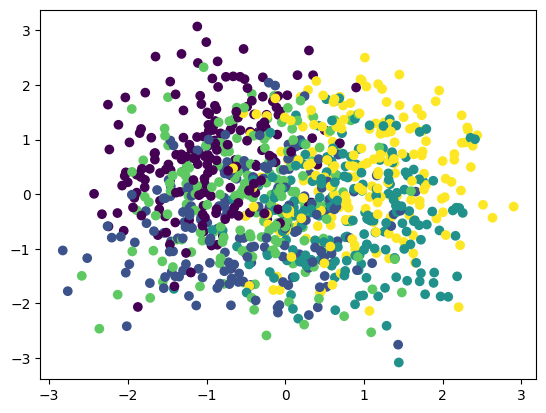

In [27]:
# Visualize clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('cluster', axis=1))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'])
plt.show()

In [28]:
# Calculate cluster statistics
cluster_stats = df.groupby('cluster').mean()

# Visualize cluster differences
import seaborn as sns
sns.pairplot(df, hue='cluster')
plt.show()



Output hidden; open in https://colab.research.google.com to view.